# Both spatially and time varying field

When it is necessary to specify an external magnetic field which varies both in space and time, it can be done by:

- defining an external magnetic field using `discretisedfield.Field`
- passing `wave` argument to `micromagneticmodel.Zeeman` term

For more details on time-varying fields, please refer to other tutorials. We start by defining a system object.

In [1]:
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

region = df.Region(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

system = mm.System(name='space_time_varying_field')

Now we can specify spatial and time varying field components. For the time-varying component, we choose a sine-wave with $5\,\text{GHz}$ frequency and no time shift.

In [2]:
def Hspace(point):
    x, y, z = point
    if x**2 + y**2 < 20e-9**2:
        return (0, 0, 1e6)
    else:
        return (0, 0, 0)

H = df.Field(mesh, nvdim=3, value=Hspace)

The spatial distribution of the field looks like:

/home/swapneel/miniconda3/envs/ubermagdev/lib/python3.8/site-packages/matplotlib/quiver.py:646: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/swapneel/miniconda3/envs/ubermagdev/lib/python3.8/site-packages/matplotlib/quiver.py:646: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


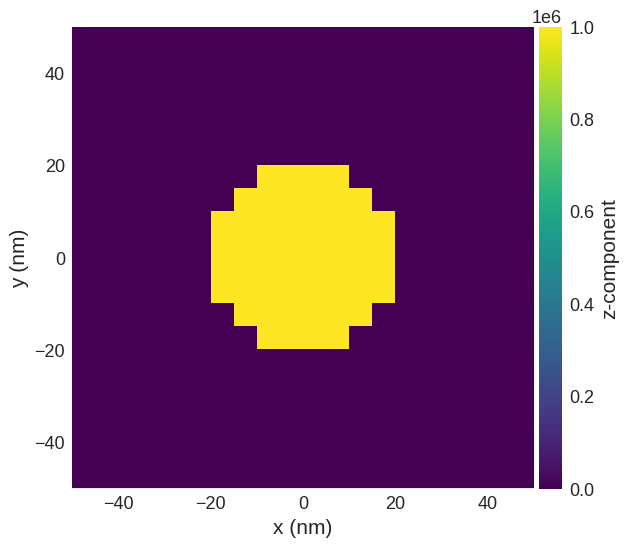

In [3]:
H.sel("z").mpl()

In [4]:
system.energy = mm.Zeeman(H=H, func='sin', f=2e9, t0=0)
system.dynamics = mm.Precession(gamma0=mm.consts.gamma0) + mm.Damping(alpha=1e-5)

# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, nvdim=3, value=(0, 0.1, 1), norm=1.1e6)

Now, we can drive the system using `TimeDriver`.

In [5]:
td = mc.TimeDriver()
td.drive(system, t=5e-9, n=500)

Running OOMMF (ExeOOMMFRunner)[2023/08/10 15:41]... (1.2 s)


We can have a look at the Zeeman energy.

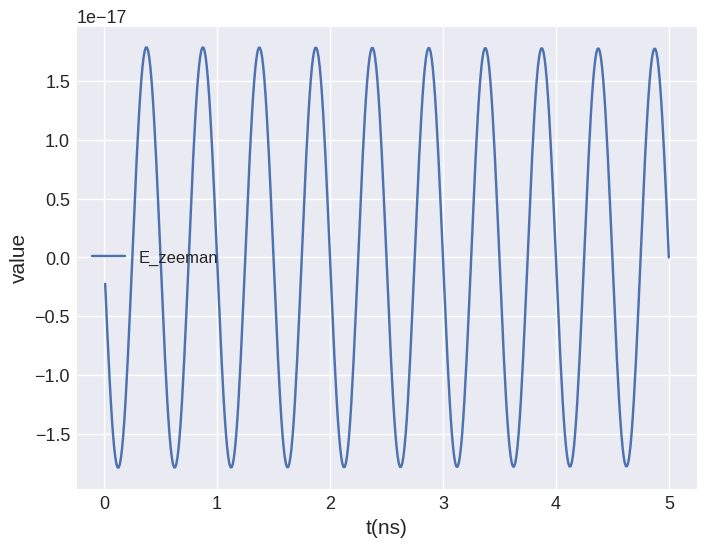

In [6]:
system.table.mpl(y=['E_zeeman'])